In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/HR-Employee-Attrition.csv')

# Data Understanding

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.dtypes.value_counts()

int64     26
object     9
dtype: int64

In [6]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Data Cleaning

In [8]:
#Drop redundant Columns
df.drop(df[['EmployeeCount','Over18','StandardHours','EmployeeNumber']],axis=1,inplace=True)

In [9]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

**Tidak ditemukan missing values dalam dataset ini**

In [10]:
df.duplicated().sum()

0

**Tidak ditemukan data duplikat dalam dataset ini**

# Exploration Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [12]:
df.select_dtypes(include='int').columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [13]:
cats = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','PerformanceRating']
nums = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate','JobInvolvement',
        'JobLevel', 'JobSatisfaction', 'MonthlyIncome','MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike','RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']

In [14]:
df[nums].describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,15.209524,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,3.659938,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,11.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,12.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,18.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


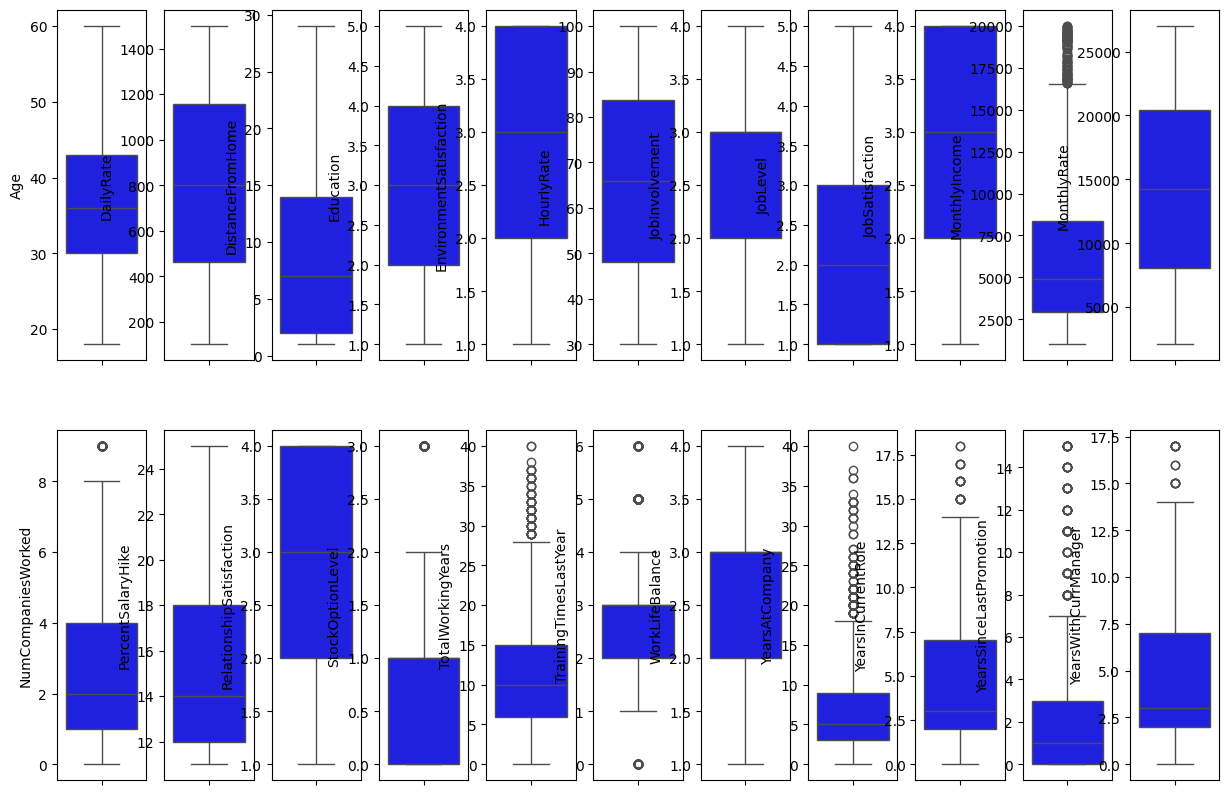

In [15]:
num_rows = 2
num_cols = len(nums) // num_rows + len(nums) % num_rows

plt.figure(figsize=(15,10))

for i in range(len(nums)):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[nums[i]], color='blue')

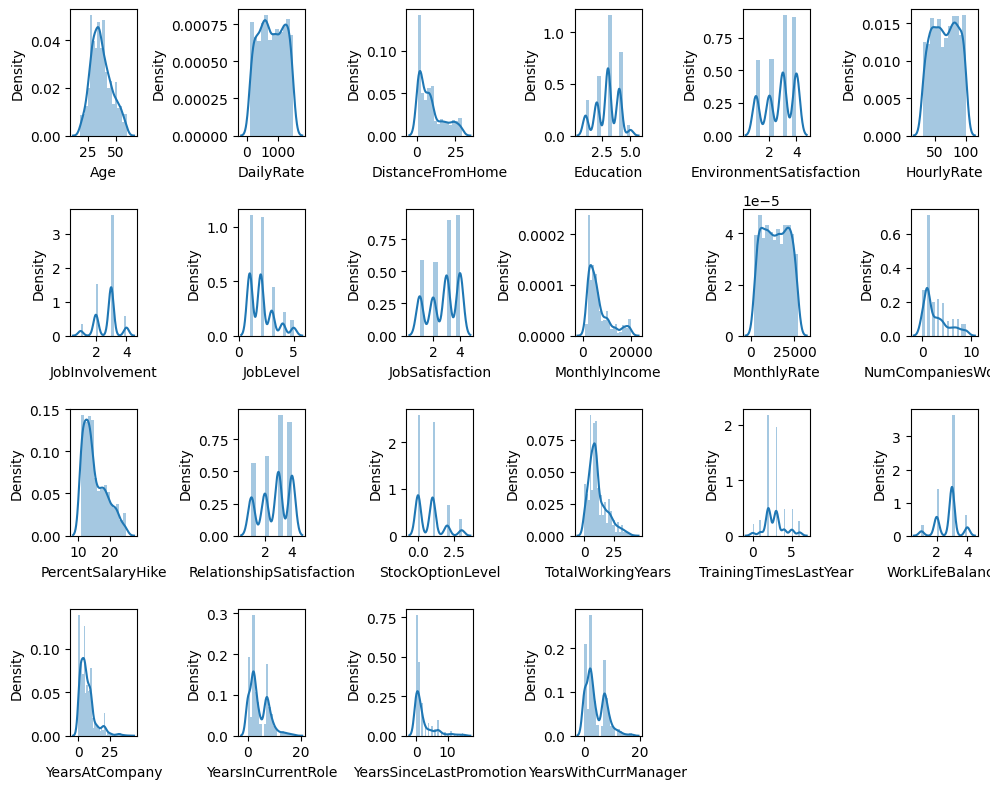

In [16]:
plt.figure(figsize=(10,8))

columns_per_row = 6
num_rows = len(nums) // columns_per_row + (len(nums) % columns_per_row > 0)

for i, col in enumerate(nums, 1):
    plt.subplot(num_rows, columns_per_row, i)
    sns.distplot(df[col])
    plt.tight_layout()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

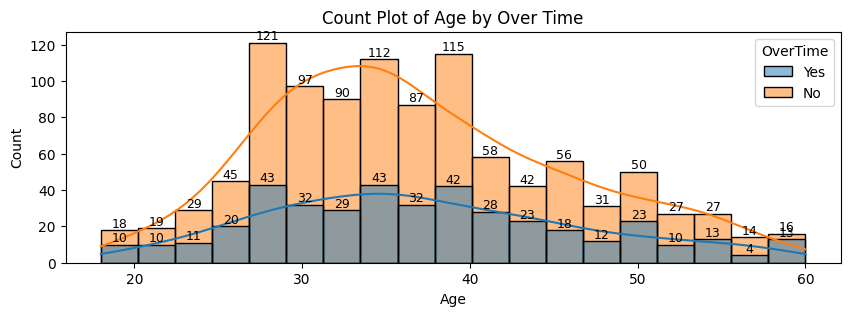

In [18]:
plt.figure(figsize=(10, 3))
ax = sns.histplot(x='Age', hue='OverTime', data=df, kde=True, fill=True, common_norm=False)

# Add text annotations to each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{round(height, 2)}', ha='center', va='bottom', fontsize=9)

plt.tick_params(axis='x')
plt.title('Count Plot of Age by Over Time')
plt.show()

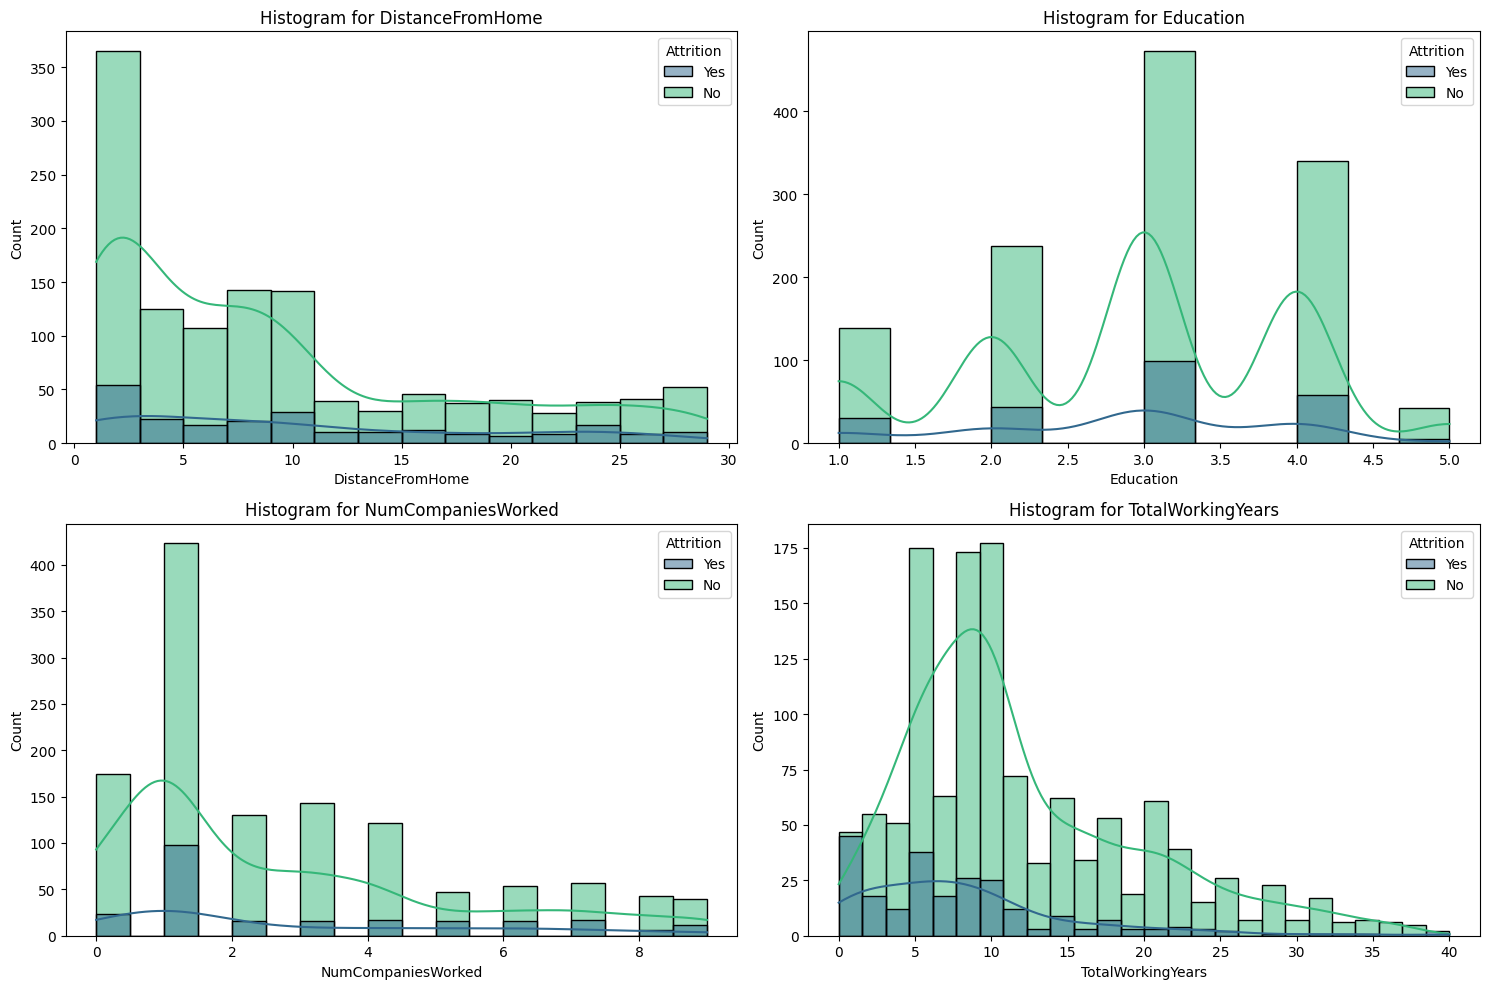

In [19]:
x = ['DistanceFromHome','Education','NumCompaniesWorked','TotalWorkingYears']

plt.figure(figsize=(15,10))

for i, col in enumerate(x,1):
  plt.subplot(2,2,i)
  sns.histplot(data=df, x=col, kde=True, hue='Attrition', palette
               = 'viridis')
  plt.title(f'Histogram for {col}')
  plt.tight_layout()

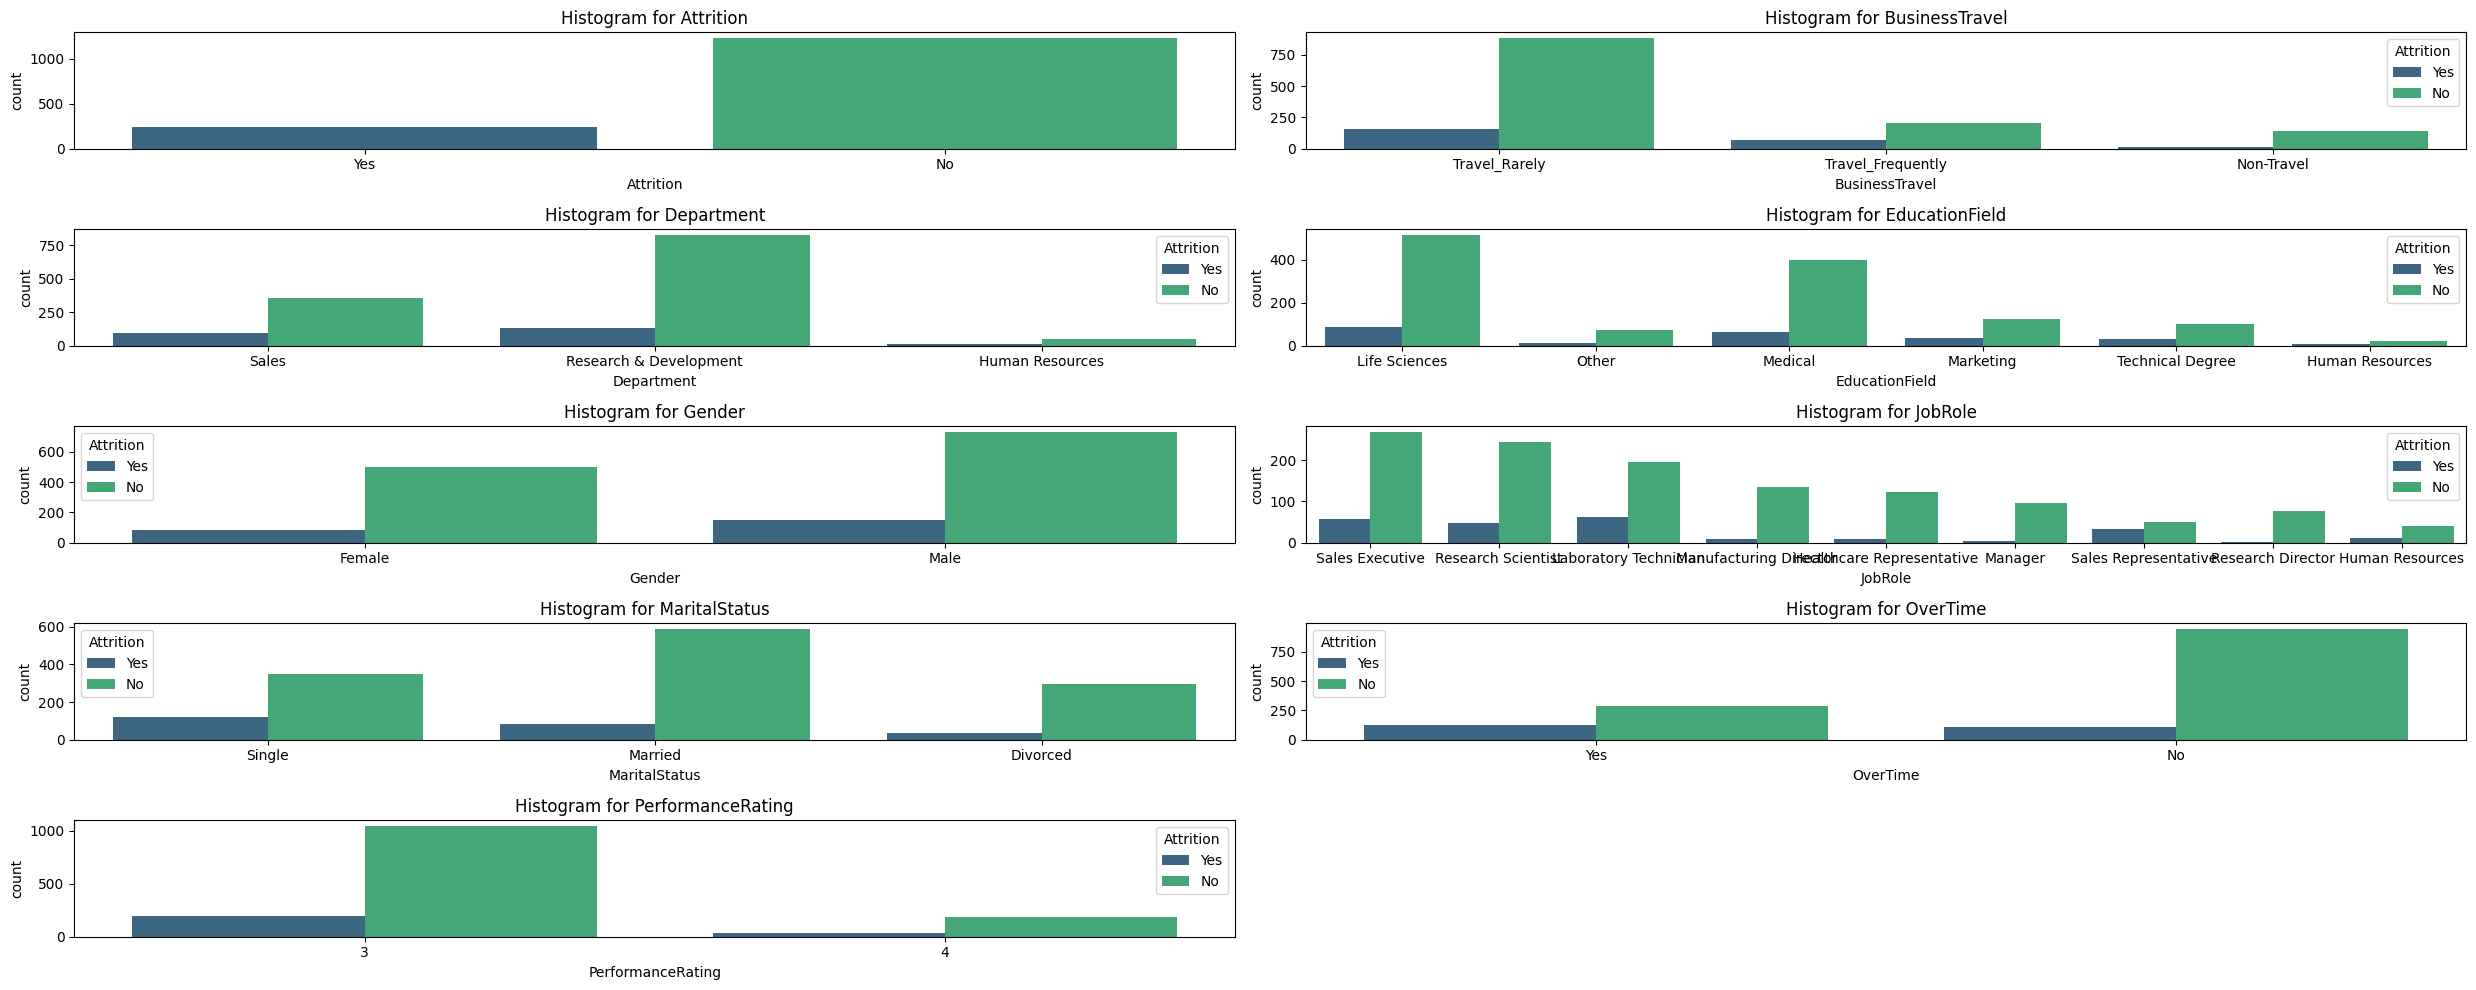

In [20]:
plt.figure(figsize=(25,10))

for i, col in enumerate(cats, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df, x=col, hue="Attrition", palette='viridis')
    plt.title(f'Histogram for {col}')

plt.tight_layout()
plt.show()

In [21]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<Axes: >

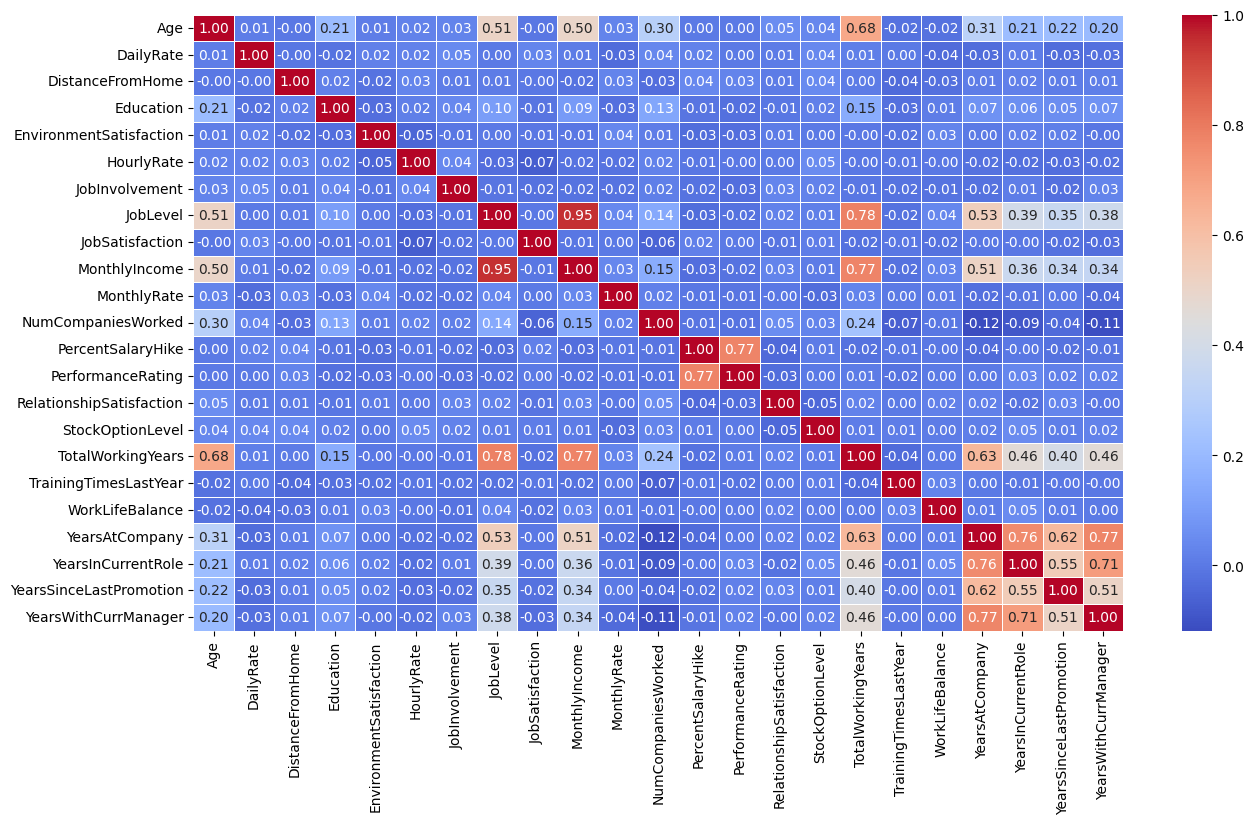

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidth=0.5)

**Job Level**

In [23]:
# Group by 'JobLevel' and count occurrences
job1 = df.groupby(['JobLevel', 'Attrition'])['MonthlyIncome'].sum().reset_index()
job2 = df.groupby(['JobLevel', 'Attrition'])['Age'].sum().reset_index()
job3 = df.groupby(['JobLevel', 'Attrition'])['TotalWorkingYears'].sum().reset_index()

#Mencari Hubungan Job Level dan Monthly Income
pivot_MonthlyIncome = job1.pivot_table(index='JobLevel', columns='Attrition', values='MonthlyIncome')
pivot_MonthlyIncome['Total'] = pivot_MonthlyIncome['Yes'] + pivot_MonthlyIncome['No']
pivot_MonthlyIncome['Ratio Yes'] = pivot_MonthlyIncome['Yes'] / pivot_MonthlyIncome['Total']
pivot_MonthlyIncome['Ratio No'] = pivot_MonthlyIncome['No'] / pivot_MonthlyIncome['Total']
pivot_MonthlyIncome.drop(['Yes','No','Total'],axis=1,inplace=True)

#Mencari Hubungan Job Level dan Age
pivot_Age = job2.pivot_table(index='JobLevel', columns='Attrition', values='Age')
pivot_Age['Total'] = pivot_Age['Yes'] + pivot_Age['No']
pivot_Age['Ratio Yes'] = pivot_Age['Yes'] / pivot_Age['Total']
pivot_Age['Ratio No'] = pivot_Age['No'] / pivot_Age['Total']
pivot_Age.drop(['Yes','No','Total'],axis=1,inplace=True)

#Mencari Hubungan Job Level dan TotalWorkingYears
pivot_TotalWorkingYears = job3.pivot_table(index='JobLevel', columns='Attrition', values='TotalWorkingYears')
pivot_TotalWorkingYears['Total'] = pivot_TotalWorkingYears['Yes'] + pivot_TotalWorkingYears['No']
pivot_TotalWorkingYears['Ratio Yes'] = pivot_TotalWorkingYears['Yes'] / pivot_TotalWorkingYears['Total']
pivot_TotalWorkingYears['Ratio No'] = pivot_TotalWorkingYears['No'] / pivot_TotalWorkingYears['Total']
pivot_TotalWorkingYears.drop(['Yes','No','Total'],axis=1,inplace=True)


print(pivot_MonthlyIncome.head())
print(pivot_Age.head())
print(pivot_TotalWorkingYears.head())

Attrition  Ratio Yes  Ratio No
JobLevel                      
1           0.245512  0.754488
2           0.101936  0.898064
3           0.140377  0.859623
4           0.040010  0.959990
5           0.073491  0.926509
Attrition  Ratio Yes  Ratio No
JobLevel                      
1           0.244494  0.755506
2           0.095579  0.904421
3           0.149331  0.850669
4           0.044255  0.955745
5           0.076176  0.923824
Attrition  Ratio Yes  Ratio No
JobLevel                      
1           0.216943  0.783057
2           0.089651  0.910349
3           0.152002  0.847998
4           0.042222  0.957778
5           0.080220  0.919780


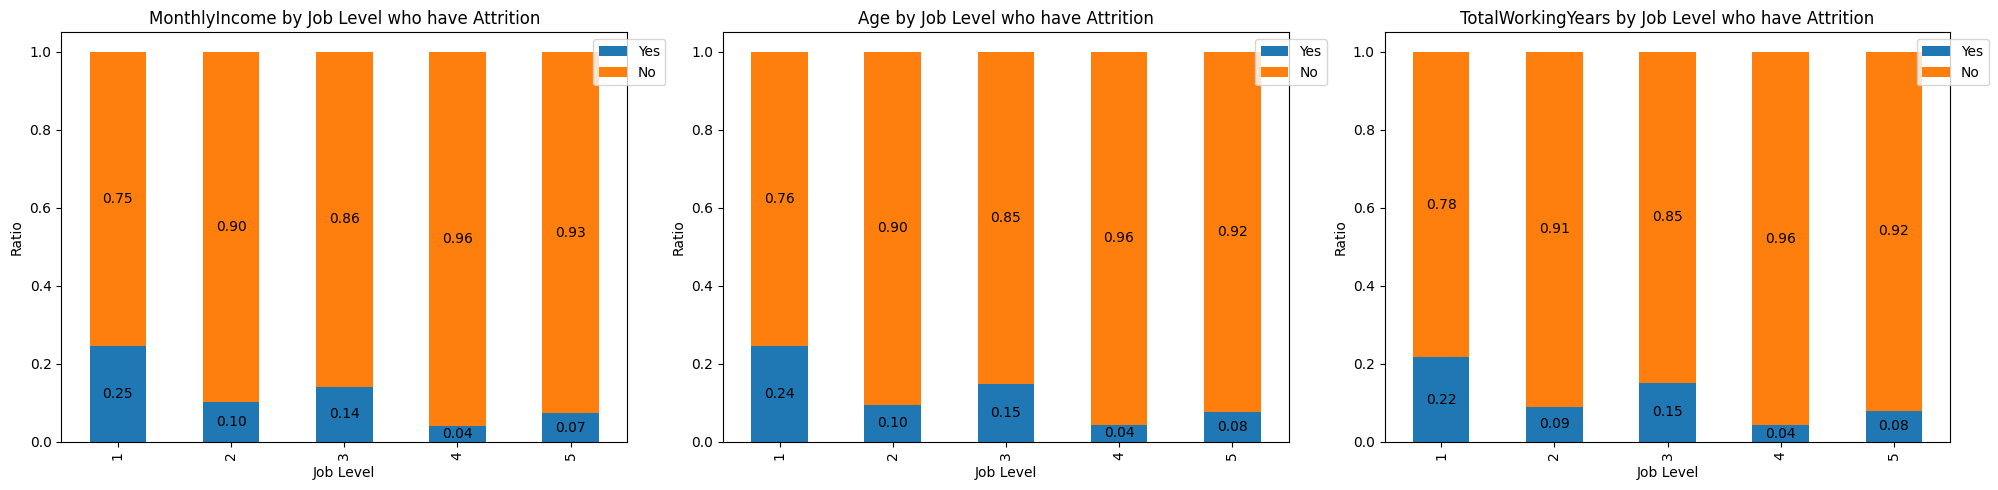

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

for ax, pivot, variable in zip(axes, [pivot_MonthlyIncome, pivot_Age, pivot_TotalWorkingYears], ['MonthlyIncome', 'Age', 'TotalWorkingYears']):
    ax = pivot.plot(kind='bar', stacked=True, ax=ax)

    # Add annotations to each bar
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                    ha='center', va='center')

    ax.set_title(f'{variable} by Job Level who have Attrition')
    ax.set_xlabel('Job Level')
    ax.set_ylabel('Ratio')
    ax.legend(['Yes', 'No'],bbox_to_anchor=(1.08, 1), loc='upper right')

plt.tight_layout()
plt.show()

**Monthly Income**

In [25]:
# Attrition Rate
total_employee = len(df)
Attrition_count = (df['Attrition'] == 'Yes').sum()
Attrition_percent = Attrition_count / total_employee * 100

print('Count of Attrition is', Attrition_count)
print('Percentage of Attrition is', Attrition_percent, '%')

Count of Attrition is 237
Percentage of Attrition is 16.122448979591837 %


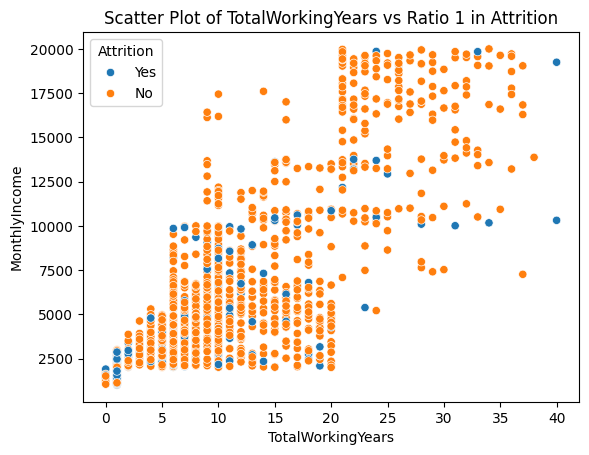

In [26]:
grouping_income = df.groupby(['MonthlyIncome', 'Attrition'])['TotalWorkingYears'].count().reset_index()
pivot_grouping_income = grouping_income.pivot_table(index='Attrition', columns='TotalWorkingYears', values='MonthlyIncome', fill_value=0)


# Scatter plot
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', hue = 'Attrition',data=df)

plt.title('Scatter Plot of TotalWorkingYears vs Ratio 1 in Attrition')
plt.xlabel('TotalWorkingYears')
plt.ylabel('MonthlyIncome')
plt.show()


In [ ]:
sns.pairplot(data=df, hue='Attrition')